This is a companion notebook for the book [Deep Learning with Python, Second Edition](https://www.manning.com/books/deep-learning-with-python-second-edition?a_aid=keras&a_bid=76564dff). For readability, it only contains runnable code blocks and section titles, and omits everything else in the book: text paragraphs, figures, and pseudocode.

**If you want to be able to follow what's going on, I recommend reading the notebook side by side with your copy of the book.**

This notebook was generated for TensorFlow 2.6.

# Fundamentals of machine learning

## Generalization: The goal of machine learning

### Underfitting and overfitting

#### Noisy training data

#### Ambiguous features

#### Rare features and spurious correlations

**Adding white-noise channels or all-zeros channels to MNIST**  
**White-noise channel & all-zeros channel을 mnist 데이터에 추가하기**

In [ ]:
from tensorflow.keras.datasets import mnist
import numpy as np

(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255

train_images_with_noise_channels = np.concatenate(
    [train_images, np.random.random((len(train_images), 784))], axis=1)    #np.random.random((len(train_images), 784)) 를 이용하여 noise 채널 생성

train_images_with_zeros_channels = np.concatenate(                         #np.zero((len(train_images), 784)) 를 이용하여 zero 채널 생성
    [train_images, np.zeros((len(train_images), 784))], axis=1)

In [ ]:
from tensorflow.keras.datasets import mnist
import numpy as np

(train_images, train_labels), _ = mnist.load_data()

In [ ]:
train_images.shape

(60000, 28, 28)

In [ ]:
(len(train_images), 784)

(60000, 784)

In [ ]:
train_images_with_noise_channels.shape

(60000, 1568)

In [ ]:
train_images_with_zeros_channels.shape

(60000, 1568)

**Training the same model on MNIST data with noise channels or all-zero channels**

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers

#model 정의
def get_model():
    model = keras.Sequential([
        layers.Dense(512, activation="relu"),
        layers.Dense(10, activation="softmax")
    ])
    model.compile(optimizer="rmsprop",
                  loss="sparse_categorical_crossentropy",
                  metrics=["accuracy"])
    return model

#model training
model = get_model()
history_noise = model.fit(
    train_images_with_noise_channels, train_labels,
    epochs=10,
    batch_size=128,
    validation_split=0.2)

model = get_model()
history_zeros = model.fit(
    train_images_with_zeros_channels, train_labels,
    epochs=10,
    batch_size=128,
    validation_split=0.2)

**validation_split :  원래 주어진 데이터셋을 얼마의 비율로 나워서 트레이닝 데이터셋과 테스트 데이터셋으로 사용할 지 결정할 수 있다.  
예를 들어, 원래 데이터셋이 1000개 이고, fit 함수의 validation_split = 0.2 로 하면, training dataset 은 800개로 하여 training 시키고, 나머지 200개는 test dataset 으로 사용하여 모델을 평가하게 된다.**

In [ ]:
#noise와 zero가 각각 accuracy에 미치는 영향을 알아보기 위해 original data를 만드는 과정
model = get_model()
history1 = model.fit(
    train_images_with_zeros_channels, train_labels,
    epochs=10,
    batch_size=128,
    validation_split=0.2)

Epoch 1/10
375/375 [==============================] - 3s 6ms/step - loss: 0.2918 - accuracy: 0.9166 - val_loss: 0.1628 - val_accuracy: 0.9506
Epoch 2/10
375/375 [==============================] - 2s 5ms/step - loss: 0.1185 - accuracy: 0.9652 - val_loss: 0.1040 - val_accuracy: 0.9670
Epoch 3/10
375/375 [==============================] - 2s 5ms/step - loss: 0.0766 - accuracy: 0.9772 - val_loss: 0.0938 - val_accuracy: 0.9714
Epoch 4/10
375/375 [==============================] - 2s 6ms/step - loss: 0.0549 - accuracy: 0.9841 - val_loss: 0.0912 - val_accuracy: 0.9735
Epoch 5/10
375/375 [==============================] - 2s 7ms/step - loss: 0.0416 - accuracy: 0.9876 - val_loss: 0.0803 - val_accuracy: 0.9782
Epoch 6/10
375/375 [==============================] - 2s 6ms/step - loss: 0.0309 - accuracy: 0.9909 - val_loss: 0.0773 - val_accuracy: 0.9795
Epoch 7/10
375/375 [==============================] - 2s 6ms/step - loss: 0.0237 - accuracy: 0.9934 - val_loss: 0.0747 - val_accuracy: 0.9793
Epoch 

**Plotting a validation accuracy comparison**

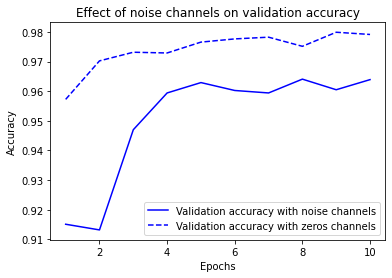

In [ ]:
#zero를 add하는 것은 accuracy에 큰 차이가 없어 보이지만, noise는 accuracy에 심각한 bad effect를 가져온다 -> noise는 피하자
import matplotlib.pyplot as plt
val_acc_noise = history_noise.history["val_accuracy"]
val_acc_zeros = history_zeros.history["val_accuracy"]
epochs = range(1, 11)
plt.plot(epochs, val_acc_noise, "b-",
         label="Validation accuracy with noise channels")
plt.plot(epochs, val_acc_zeros, "b--",
         label="Validation accuracy with zeros channels")
plt.title("Effect of noise channels on validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

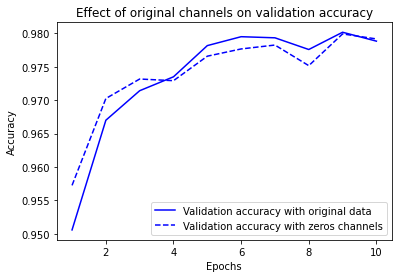

In [ ]:
#zero channels는 original data의 accuracy와 큰 차이가 없어보임
import matplotlib.pyplot as plt
val_acc = history1.history["val_accuracy"]
val_acc_zeros = history_zeros.history["val_accuracy"]
epochs = range(1, 11)
plt.plot(epochs, val_acc, "b-",
         label="Validation accuracy with original data")
plt.plot(epochs, val_acc_zeros, "b--",
         label="Validation accuracy with zeros channels")
plt.title("Effect of original channels on validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

### The nature of generalization in deep learning

**Fitting a MNIST model with randomly shuffled labels**

In [ ]:
(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255

random_train_labels = train_labels[:]  #일종의 copy하는 과정이라고 보면됨
np.random.shuffle(random_train_labels) #shuffle하기


#model training 과정 : Deep Learning의 특성 'fit anything'으로 인해 epoch가 진행될 수록 accuracy는 높아지지만, val_accuaracy는 지지부진함 = 오버피팅의 발생
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model.fit(train_images, random_train_labels,
          epochs=100,
          batch_size=128,
          validation_split=0.2)

Epoch 1/100
375/375 [==============================] - 2s 5ms/step - loss: 2.3179 - accuracy: 0.1016 - val_loss: 2.3075 - val_accuracy: 0.1077
Epoch 2/100
375/375 [==============================] - 2s 4ms/step - loss: 2.2989 - accuracy: 0.1158 - val_loss: 2.3173 - val_accuracy: 0.1006
Epoch 3/100
375/375 [==============================] - 2s 4ms/step - loss: 2.2892 - accuracy: 0.1286 - val_loss: 2.3175 - val_accuracy: 0.1047
Epoch 4/100
375/375 [==============================] - 2s 4ms/step - loss: 2.2754 - accuracy: 0.1394 - val_loss: 2.3310 - val_accuracy: 0.0961
Epoch 5/100
375/375 [==============================] - 2s 5ms/step - loss: 2.2579 - accuracy: 0.1554 - val_loss: 2.3398 - val_accuracy: 0.1008
Epoch 6/100
375/375 [==============================] - 2s 5ms/step - loss: 2.2362 - accuracy: 0.1688 - val_loss: 2.3564 - val_accuracy: 0.1006
Epoch 7/100
375/375 [==============================] - 2s 4ms/step - loss: 2.2115 - accuracy: 0.1852 - val_loss: 2.3716 - val_accuracy: 0.0973

#### The manifold hypothesis

#### Interpolation as a source of generalization

#### Why deep learning works

#### Training data is paramount

## Evaluating machine-learning models

### Training, validation, and test sets

#### Simple hold-out validation

#### K-fold validation

#### Iterated K-fold validation with shuffling

### Beating a common-sense baseline

### Things to keep in mind about model evaluation

## Improving model fit

### Tuning key gradient descent parameters

**Training a MNIST model with an incorrectly high learning rate**

In [ ]:
(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255

model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])
model.compile(optimizer=keras.optimizers.RMSprop(1.), #optimizer=keras.optimizers.RMSprop(1.)를 이용하여 learning rate 지정하기
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model.fit(train_images, train_labels,
          epochs=10,
          batch_size=128,
          validation_split=0.2)

Epoch 1/10
375/375 [==============================] - 2s 5ms/step - loss: 792.6533 - accuracy: 0.3626 - val_loss: 2.2933 - val_accuracy: 0.2243
Epoch 2/10
375/375 [==============================] - 2s 4ms/step - loss: 4.4270 - accuracy: 0.2153 - val_loss: 2.5872 - val_accuracy: 0.1948
Epoch 3/10
375/375 [==============================] - 2s 4ms/step - loss: 2.8346 - accuracy: 0.1835 - val_loss: 2.3066 - val_accuracy: 0.1826
Epoch 4/10
375/375 [==============================] - 2s 4ms/step - loss: 2.7654 - accuracy: 0.1891 - val_loss: 2.2101 - val_accuracy: 0.1908
Epoch 5/10
375/375 [==============================] - 2s 4ms/step - loss: 2.5778 - accuracy: 0.2014 - val_loss: 2.2171 - val_accuracy: 0.2329
Epoch 6/10
375/375 [==============================] - 2s 4ms/step - loss: 2.5436 - accuracy: 0.2082 - val_loss: 2.4760 - val_accuracy: 0.1998
Epoch 7/10
375/375 [==============================] - 2s 4ms/step - loss: 2.4556 - accuracy: 0.2014 - val_loss: 2.2625 - val_accuracy: 0.1698
Epoc

**The same model with a more appropriate learning rate**

In [ ]:
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])
model.compile(optimizer=keras.optimizers.RMSprop(1e-2),#적정한 learning rate의 적용
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model.fit(train_images, train_labels,
          epochs=10,
          batch_size=128,
          validation_split=0.2)

Epoch 1/10
375/375 [==============================] - 2s 5ms/step - loss: 0.3720 - accuracy: 0.9122 - val_loss: 0.2362 - val_accuracy: 0.9362
Epoch 2/10
375/375 [==============================] - 2s 4ms/step - loss: 0.1449 - accuracy: 0.9636 - val_loss: 0.1803 - val_accuracy: 0.9617
Epoch 3/10
375/375 [==============================] - 2s 4ms/step - loss: 0.1112 - accuracy: 0.9735 - val_loss: 0.1829 - val_accuracy: 0.9669
Epoch 4/10
375/375 [==============================] - 2s 4ms/step - loss: 0.1007 - accuracy: 0.9781 - val_loss: 0.1905 - val_accuracy: 0.9691
Epoch 5/10
375/375 [==============================] - 2s 4ms/step - loss: 0.0853 - accuracy: 0.9822 - val_loss: 0.2094 - val_accuracy: 0.9712
Epoch 6/10
375/375 [==============================] - 2s 4ms/step - loss: 0.0843 - accuracy: 0.9839 - val_loss: 0.2984 - val_accuracy: 0.9653
Epoch 7/10
375/375 [==============================] - 2s 4ms/step - loss: 0.0721 - accuracy: 0.9856 - val_loss: 0.2603 - val_accuracy: 0.9717
Epoch 

### Leveraging better architecture priors

### Increasing model capacity

**A simple logistic regression on MNIST**

In [ ]:
model = keras.Sequential([layers.Dense(10, activation="softmax")]) #단일 layer를 가진 모델을 설정했을때 : small model
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
history_small_model = model.fit(
    train_images, train_labels,
    epochs=20,
    batch_size=128,
    validation_split=0.2)

Epoch 1/20
375/375 [==============================] - 2s 4ms/step - loss: 0.6646 - accuracy: 0.8365 - val_loss: 0.3587 - val_accuracy: 0.9035
Epoch 2/20
375/375 [==============================] - 1s 3ms/step - loss: 0.3512 - accuracy: 0.9027 - val_loss: 0.3086 - val_accuracy: 0.9158
Epoch 3/20
375/375 [==============================] - 1s 3ms/step - loss: 0.3158 - accuracy: 0.9118 - val_loss: 0.2918 - val_accuracy: 0.9187
Epoch 4/20
375/375 [==============================] - 1s 3ms/step - loss: 0.2995 - accuracy: 0.9162 - val_loss: 0.2829 - val_accuracy: 0.9204
Epoch 5/20
375/375 [==============================] - 1s 3ms/step - loss: 0.2899 - accuracy: 0.9184 - val_loss: 0.2762 - val_accuracy: 0.9231
Epoch 6/20
375/375 [==============================] - 1s 4ms/step - loss: 0.2830 - accuracy: 0.9204 - val_loss: 0.2734 - val_accuracy: 0.9255
Epoch 7/20
375/375 [==============================] - 1s 3ms/step - loss: 0.2782 - accuracy: 0.9220 - val_loss: 0.2696 - val_accuracy: 0.9270
Epoch 

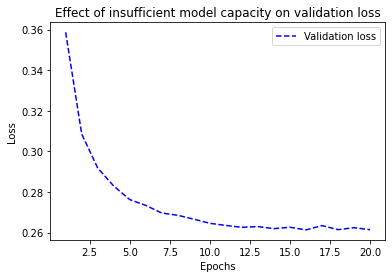

In [ ]:
import matplotlib.pyplot as plt
val_loss = history_small_model.history["val_loss"]
epochs = range(1, 21)
plt.plot(epochs, val_loss, "b--",
         label="Validation loss")
plt.title("Effect of insufficient model capacity on validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
#small model에 대한 val_loss그래프를 그려보면 어디서 최소의 loss인지, 언제 overfitting 되었는지 확인할 수 없음(model 너무 작아서)

In [ ]:
model = keras.Sequential([
    layers.Dense(96, activation="relu"),
    layers.Dense(96, activation="relu"),     #3-layers의 설정 : not a small model(위 모델과 비교할 때)
    layers.Dense(10, activation="softmax"),
])
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
history_large_model = model.fit(
    train_images, train_labels,
    epochs=20,
    batch_size=128,
    validation_split=0.2)

Epoch 1/20
375/375 [==============================] - 2s 5ms/step - loss: 0.3596 - accuracy: 0.8983 - val_loss: 0.1836 - val_accuracy: 0.9480
Epoch 2/20
375/375 [==============================] - 2s 4ms/step - loss: 0.1622 - accuracy: 0.9507 - val_loss: 0.1318 - val_accuracy: 0.9591
Epoch 3/20
375/375 [==============================] - 2s 4ms/step - loss: 0.1128 - accuracy: 0.9660 - val_loss: 0.1190 - val_accuracy: 0.9650
Epoch 4/20
375/375 [==============================] - 1s 4ms/step - loss: 0.0866 - accuracy: 0.9743 - val_loss: 0.0986 - val_accuracy: 0.9701
Epoch 5/20
375/375 [==============================] - 2s 4ms/step - loss: 0.0685 - accuracy: 0.9786 - val_loss: 0.0937 - val_accuracy: 0.9711
Epoch 6/20
375/375 [==============================] - 2s 4ms/step - loss: 0.0567 - accuracy: 0.9833 - val_loss: 0.0970 - val_accuracy: 0.9715
Epoch 7/20
375/375 [==============================] - 2s 4ms/step - loss: 0.0466 - accuracy: 0.9858 - val_loss: 0.0899 - val_accuracy: 0.9748
Epoch 

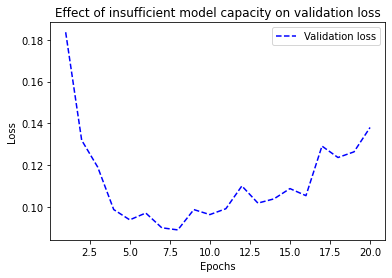

In [ ]:
import matplotlib.pyplot as plt
val_loss = history_large_model.history["val_loss"]
epochs = range(1, 21)
plt.plot(epochs, val_loss, "b--",
         label="Validation loss")
plt.title("Effect of insufficient model capacity on validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

## Improving generalization

### Dataset curation

### Feature engineering

### Using early stopping

### Regularizing your model

#### Reducing the network's size

**Original model**

In [ ]:
from tensorflow.keras.datasets import imdb
(train_data, train_labels), _ = imdb.load_data(num_words=10000)

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results
train_data = vectorize_sequences(train_data)

model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_original = model.fit(train_data, train_labels,
                             epochs=20, batch_size=512, validation_split=0.4)

17473536/17464789 [==============================] - 1s 0us/step
Epoch 1/20
30/30 [==============================] - 3s 42ms/step - loss: 0.5292 - accuracy: 0.7759 - val_loss: 0.3998 - val_accuracy: 0.8642
Epoch 2/20
30/30 [==============================] - 1s 21ms/step - loss: 0.3211 - accuracy: 0.9001 - val_loss: 0.3287 - val_accuracy: 0.8744
Epoch 3/20
30/30 [==============================] - 1s 22ms/step - loss: 0.2339 - accuracy: 0.9239 - val_loss: 0.2992 - val_accuracy: 0.8788
Epoch 4/20
30/30 [==============================] - 1s 25ms/step - loss: 0.1857 - accuracy: 0.9411 - val_loss: 0.2785 - val_accuracy: 0.8876
Epoch 5/20
30/30 [==============================] - 1s 25ms/step - loss: 0.1500 - accuracy: 0.9538 - val_loss: 0.3187 - val_accuracy: 0.8751
Epoch 6/20
30/30 [==============================] - 1s 21ms/step - loss: 0.1256 - accuracy: 0.9608 - val_loss: 0.2907 - val_accuracy: 0.8865
Epoch 7/20
30/30 [==============================] - 1s 24ms/step - loss: 0.1008 - accurac

**Version of the model with lower capacity**

In [ ]:
model = keras.Sequential([
    layers.Dense(4, activation="relu"),
    layers.Dense(4, activation="relu"),             #아래 모델과  비교했을 때 layer당 적은 ouputs 수
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_smaller_model = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 [==============================] - 2s 38ms/step - loss: 0.6493 - accuracy: 0.5817 - val_loss: 0.6056 - val_accuracy: 0.6591
Epoch 2/20
30/30 [==============================] - 1s 21ms/step - loss: 0.5739 - accuracy: 0.7410 - val_loss: 0.5559 - val_accuracy: 0.7513
Epoch 3/20
30/30 [==============================] - 1s 25ms/step - loss: 0.5237 - accuracy: 0.8049 - val_loss: 0.5233 - val_accuracy: 0.7688
Epoch 4/20
30/30 [==============================] - 1s 21ms/step - loss: 0.4852 - accuracy: 0.8512 - val_loss: 0.4944 - val_accuracy: 0.8492
Epoch 5/20
30/30 [==============================] - 1s 21ms/step - loss: 0.4541 - accuracy: 0.8803 - val_loss: 0.4793 - val_accuracy: 0.8264
Epoch 6/20
30/30 [==============================] - 1s 22ms/step - loss: 0.4290 - accuracy: 0.8994 - val_loss: 0.4621 - val_accuracy: 0.8510
Epoch 7/20
30/30 [==============================] - 1s 22ms/step - loss: 0.4042 - accuracy: 0.9185 - val_loss: 0.4402 - val_accuracy: 0.8762
Epoch 8/20
30

**Version of the model with higher capacity**

In [ ]:
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(512, activation="relu"),        #위의 모델과 비교했을 때 layer당 ouputs 수가 크다
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_larger_model = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 [==============================] - 2s 47ms/step - loss: 0.5932 - accuracy: 0.7774 - val_loss: 0.3231 - val_accuracy: 0.8679
Epoch 2/20
30/30 [==============================] - 1s 31ms/step - loss: 0.2429 - accuracy: 0.9024 - val_loss: 0.2823 - val_accuracy: 0.8855
Epoch 3/20
30/30 [==============================] - 1s 30ms/step - loss: 0.1484 - accuracy: 0.9448 - val_loss: 0.3348 - val_accuracy: 0.8848
Epoch 4/20
30/30 [==============================] - 1s 31ms/step - loss: 0.0851 - accuracy: 0.9733 - val_loss: 0.3786 - val_accuracy: 0.8890
Epoch 5/20
30/30 [==============================] - 1s 29ms/step - loss: 0.1006 - accuracy: 0.9751 - val_loss: 0.3426 - val_accuracy: 0.8893
Epoch 6/20
30/30 [==============================] - 1s 29ms/step - loss: 0.0039 - accuracy: 0.9998 - val_loss: 0.5124 - val_accuracy: 0.8883
Epoch 7/20
30/30 [==============================] - 1s 28ms/step - loss: 5.1294e-04 - accuracy: 1.0000 - val_loss: 0.6327 - val_accuracy: 0.8880
Epoch 8/2

#### Adding weight regularization

**Adding L2 weight regularization to the model**

In [ ]:
from tensorflow.keras import regularizers
model = keras.Sequential([
    layers.Dense(16,
                 kernel_regularizer=regularizers.l2(0.002),  #L1 regularization 지정(layer 한 줄마다 그 아래에 적어야 함)
                 activation="relu"),
    layers.Dense(16,
                 kernel_regularizer=regularizers.l2(0.002),   
                 activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_l2_reg = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 [==============================] - 2s 36ms/step - loss: 0.5899 - accuracy: 0.7754 - val_loss: 0.4547 - val_accuracy: 0.8740
Epoch 2/20
30/30 [==============================] - 1s 20ms/step - loss: 0.3913 - accuracy: 0.8933 - val_loss: 0.4009 - val_accuracy: 0.8737
Epoch 3/20
30/30 [==============================] - 1s 24ms/step - loss: 0.3264 - accuracy: 0.9165 - val_loss: 0.3621 - val_accuracy: 0.8905
Epoch 4/20
30/30 [==============================] - 1s 20ms/step - loss: 0.2929 - accuracy: 0.9270 - val_loss: 0.3686 - val_accuracy: 0.8826
Epoch 5/20
30/30 [==============================] - 1s 20ms/step - loss: 0.2766 - accuracy: 0.9331 - val_loss: 0.3611 - val_accuracy: 0.8847
Epoch 6/20
30/30 [==============================] - 1s 21ms/step - loss: 0.2613 - accuracy: 0.9381 - val_loss: 0.3719 - val_accuracy: 0.8803
Epoch 7/20
30/30 [==============================] - 1s 21ms/step - loss: 0.2473 - accuracy: 0.9433 - val_loss: 0.3641 - val_accuracy: 0.8838
Epoch 8/20
30

**Different weight regularizers available in Keras**

In [ ]:
from tensorflow.keras import regularizers
regularizers.l1(0.001)
regularizers.l1_l2(l1=0.001, l2=0.001) #두개 다 할 때

#### Adding dropout

**Adding dropout to the IMDB model**

In [ ]:
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dropout(0.5),                          #layers.Dropout을 이용하기 -> layer 한 줄 아래마다 추가해줘야하는 코드임
    layers.Dense(16, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_dropout = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 [==============================] - 2s 36ms/step - loss: 0.6301 - accuracy: 0.6412 - val_loss: 0.5116 - val_accuracy: 0.8355
Epoch 2/20
30/30 [==============================] - 1s 20ms/step - loss: 0.5183 - accuracy: 0.7541 - val_loss: 0.4118 - val_accuracy: 0.8759
Epoch 3/20
30/30 [==============================] - 1s 20ms/step - loss: 0.4437 - accuracy: 0.8045 - val_loss: 0.3387 - val_accuracy: 0.8830
Epoch 4/20
30/30 [==============================] - 1s 21ms/step - loss: 0.3806 - accuracy: 0.8464 - val_loss: 0.3015 - val_accuracy: 0.8883
Epoch 5/20
30/30 [==============================] - 1s 21ms/step - loss: 0.3366 - accuracy: 0.8703 - val_loss: 0.2922 - val_accuracy: 0.8835
Epoch 6/20
30/30 [==============================] - 1s 24ms/step - loss: 0.2944 - accuracy: 0.8914 - val_loss: 0.2732 - val_accuracy: 0.8912
Epoch 7/20
30/30 [==============================] - 1s 24ms/step - loss: 0.2632 - accuracy: 0.9073 - val_loss: 0.2731 - val_accuracy: 0.8920
Epoch 8/20
30

## Summary